In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [16]:
df= pd.read_csv("titanic_train.csv").replace("male",0).replace("female",1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


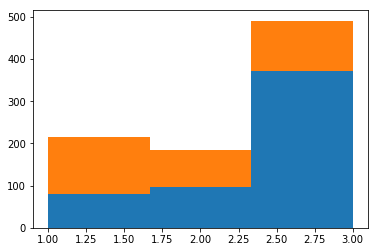

In [18]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)
plt.show()

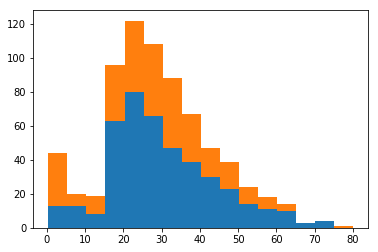

In [19]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)
plt.show()

In [20]:
df["Age"].fillna(df.Age.median(), inplace=True)

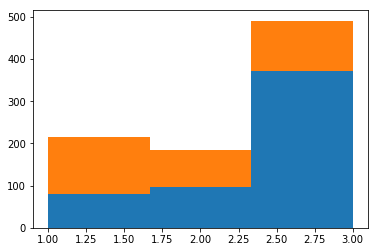

In [21]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)
plt.show()

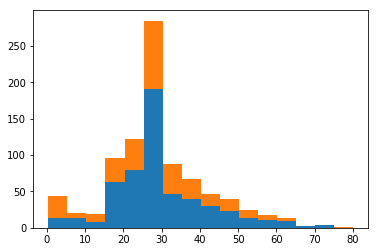

In [22]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)
plt.show()

In [23]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)
df2.head(5)

,PassengerId,Survived,Pclass,Sex,Age,FamilySize
0,1,0,3,0,22.0,2
1,2,1,1,1,38.0,2
2,3,1,3,1,26.0,1
3,4,1,1,1,35.0,2
4,5,0,3,0,35.0,1


In [24]:
train_data = df2.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)
test_df= pd.read_csv("titanic_test.csv").replace("male",0).replace("female",1)
# 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [26]:
test_data = test_df2.values
xs_test = test_data[:, 1:]
output = forest.predict(xs_test)

# print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)
predict_data

[(892, 0),
 (893, 0),
 (894, 1),
 (895, 0),
 (896, 1),
 (897, 0),
 (898, 0),
 (899, 0),
 (900, 0),
 (901, 1),
 (902, 1),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 1),
 (911, 0),
 (912, 0),
 (913, 0),
 (914, 1),
 (915, 0),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 0),
 (925, 1),
 (926, 0),
 (927, 0),
 (928, 1),
 (929, 0),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 1),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 0),
 (956, 0),
 (957, 1),
 (958, 0),
 (959, 0),
 (960, 0),
 (961, 1),
 (962, 0),
 (963, 0),
 (964, 1),
 (965, 0),
 (966, 1),
 (967, 1),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 0),
 (972, 1),
 (973, 0),
 (974, 1),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 0),
 (979, 0),
 (980, 0),
 (981, 1),
 (982, 1),

In [27]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])

In [28]:
# 上記の方法で行なった結果：０.７０３３４

In [29]:
data = pd.read_csv("titanic_train.csv").replace("male",0).replace("female",1)
data = data.replace("C",0).replace("Q",1).replace("S",2)
split_data = []
for did_survive in [0,1]:
    split_data.append(data[data.Survived==did_survive])

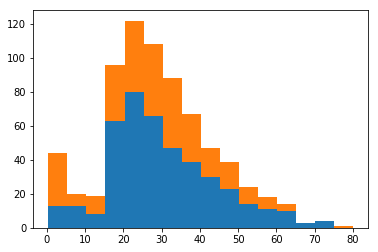

In [30]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)
plt.show()

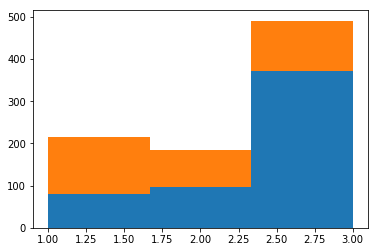

In [31]:
temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)
plt.show()

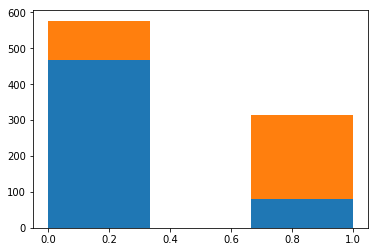

In [32]:
temp = [i["Sex"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)
plt.show()

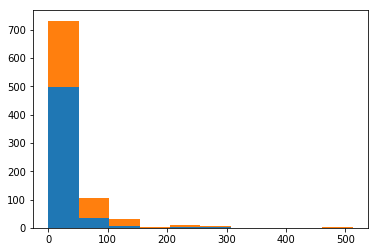

In [33]:
temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=10)
plt.show()

In [34]:
df3 = pd.read_csv("titanic_train.csv")
#とりあえず全て数値にする
df3.Embarked = df3.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
#df.Cabin = df.Cabin.replace('NaN', 0)
df3.Sex = df3.Sex.replace(['male', 'female'], [0, 1])
df3.Age = df3.Age.replace('NaN', 0)
df3.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [35]:
df3.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [36]:
corrmat = df.corr()
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.200988
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.217138,1.000000


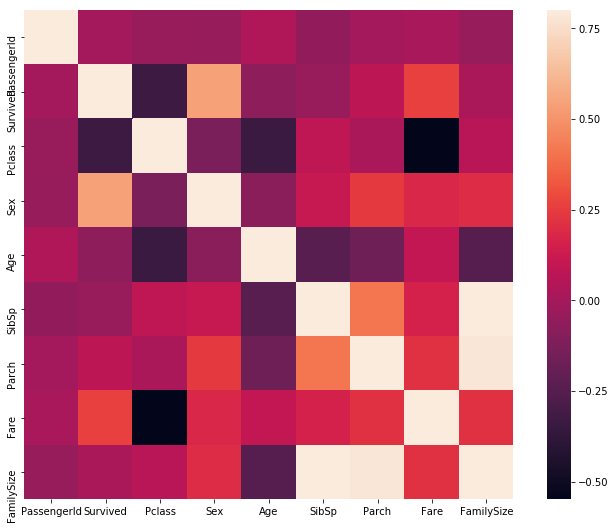

In [37]:
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [38]:
train_labels = df3['Survived'].values
train_features = df3
train_features.drop('Survived', axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

In [39]:
from sklearn import svm
svm = svm.LinearSVC()
svm.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [40]:
df_test = pd.read_csv("titanic_test.csv")

In [41]:
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 文字列の数値置換
df_test.Embarked = df_test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
df_test.Sex = df_test.Sex.replace(['male', 'female'], [0, 1])
df_test.Age = df_test.Age.replace('NaN', 29.361582)

# array値に変換
test_features = df_test.values.astype(np.int64)

In [42]:
y_test_pred = svm.predict(test_features)

In [43]:
# テスト値を再読み込みして，SVMでクラス分類したカラムを追加
df_out = pd.read_csv("titanic_test.csv")
df_out["Survived"] = y_test_pred

# outputディレクトリに出力する
df_out[["PassengerId","Survived"]].to_csv("predict_result_data2.csv",index=False)

In [ ]:
# 上記の方法で行なった結果：０.６１２４４

In [44]:
def to_feature(data):

    embarked = []
    for i in data["Embarked"]:
        temp = np.zeros(3)
        if not np.isnan(i):
            temp.put(i, 1)
        embarked.append(temp)
    feature = embarked

    pclass = []
    for i in data["Pclass"]:
        temp = np.zeros(3)
        if not np.isnan(i):
            temp.put(i - 1, 1)
        pclass.append(temp)
    feature = np.c_[feature, pclass]

    feature = np.c_[feature, data["Age_na"]]
    feature = np.c_[feature, data["Cabin_na"]]

    for keyword in ["Master.", "Col.", "Mrs.",
                    "Ms.", "Miss.", "Rev.",
                    "Mr.",  "Dr.", "Major."]:

        feature = np.c_[feature, data.Name.str.contains(keyword).astype(int)]

    try:
        feature = np.c_[feature, data["Age"]]
    except:
        pass
    try:
        feature = np.c_[feature, data["Fare"]]
    except:
        pass
    try:
        feature = np.c_[feature, data["SibSp"]]
    except:
        pass
    try:
        feature = np.c_[feature, data["Parch"]]
    except:
        pass
    feature = np.c_[feature, data["Sex"]]
    feature = np.c_[feature, data["PassengerId"]]

    return feature

In [45]:
def read_data(data_filename):
    data = pd.read_csv(data_filename).replace("male", 0).replace("female", 1)
    data = data.replace("C", 0).replace("Q", 1).replace("S", 2)
    return data

In [63]:
def add_is_na_columns(data):
    for label in ["Age", "Cabin"]:
        temp = pd.DataFrame(pd.isnull(data[label]).astype(int))
        temp.columns = [label + "_na"]
        data = pd.concat([data, temp], axis=1)
    return data

In [53]:
from sklearn.linear_model import Perceptron
import sklearn.preprocessing

In [58]:
test_data = add_is_na_columns(read_data("titanic_test.csv"))
train_data = add_is_na_columns(read_data("titanic_train.csv"))

label_categories = [['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Embarked', 'Cabin_na', 'Age_na'],
                        ['PassengerId', 'Name', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',  'Embarked', 'Cabin_na', 'Age_na']]

results = []

In [73]:
for i in range(1):
    for label in label_categories:
        temp_train_data = train_data.loc[:, train_data.columns.isin(label + ["Survived"])].dropna()
        temp_test_data = test_data.loc[:, test_data.columns.isin(label)].dropna()

        train_vec = to_feature(temp_train_data)
        test_vec = to_feature(temp_test_data)

        min_max_scaler = sklearn.preprocessing.MinMaxScaler()

        no_normalize_index = 17
        min_max_scaler.fit(train_vec[:, no_normalize_index:])

        test_vec[:, no_normalize_index:] = min_max_scaler.transform(test_vec[:, no_normalize_index:])
        train_vec[:, no_normalize_index:] = min_max_scaler.transform(train_vec[:, no_normalize_index:])

        nn = Perceptron(eta0=0.1)
        results.append([temp_test_data.PassengerId,nn.fit(train_vec,temp_train_data["Survived"],test_vec)])

results.append([[1044], [1, 0]])  # Fareが欠損している一人は死んだことにする


/Users/rintarokomori/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: Provided coef_init does not match dataset.

In [60]:
f = open("predict_result_data3.csv", "w")
f.write("PassengerId,Survived\n")

for result in results:
    for i in zip(*result):
        print (i)
        f.write("%d,%d\n" % (i[0], np.argmax(i[1])))
f.close()

In [ ]:
# 最後のがまだ未完成。1回目のランダムフォレストがまだ一番良い数値をえた。